In [0]:
import numpy as np
import matplotlib.pyplot as plt

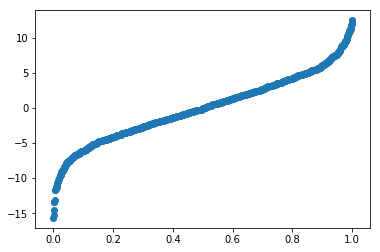

In [0]:
u=np.random.randn(1000,)*5
#print u
u.sort()
#print u
t=np.linspace(0,1,1000)
#print t
plt.scatter(t,u)
plt.show()

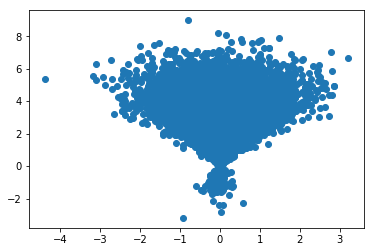

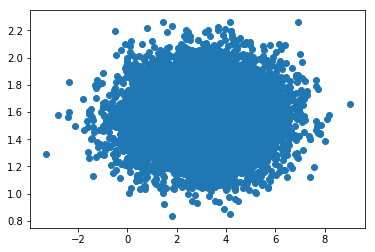

In [0]:
r=np.random.randn(10000,)*1.5+3
theta=np.random.randn(10000,)*np.pi/16+np.pi/2
x=r*np.cos(theta)
y=r*np.sin(theta)
plt.scatter(x,y)
plt.show()

plt.scatter(r,theta)
plt.show()

#Independent on Current State

[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 1.]


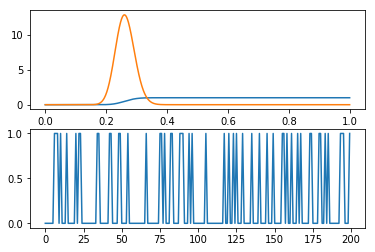

In [0]:
def beta(x,a,b):
  #Incomplete Beta Function
  return x**a*(1-x)**b/integral(0.,1.,1000,a,b)
def integral(lb,ub,n,a,b):
  #Definitions of Trapezoid
  stepSize=float((ub-lb)/n)		#Height
  x=np.linspace(lb,ub,n+1)		#Location
  y=float(2*np.sum(x**a*(1-x)**b))		#=[2*sum(3i^2) for i in x]
  y-=(lb**a*(1-lb)**b+ub**a*(1-ub)**b)			#Subtracting Fenceposts (only do this in master node)
  y*=stepSize/2			#Time Height/2
  #print y
  return y

ploss=0.3
n=200
recv=np.floor(np.random.rand(n,)+ploss)
print recv
dom=np.linspace(0,1,1000)
total=int(np.sum(recv))
fx=beta(dom,total,n-total)
beta_cdf=np.zeros_like(dom)
for k in range(len(dom)):
  beta_cdf[k]=integral(0.,dom[k],1000,total,n-total)/integral(0.,1.,1000,total,n-total)
plt.subplot(211)
plt.plot(dom,beta_cdf)
plt.plot(dom,fx)

plt.subplot(212)
plt.plot(recv)
plt.show()

0.967741935484
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
30.0 4.0
27.575586806001922 4.3818500763208235


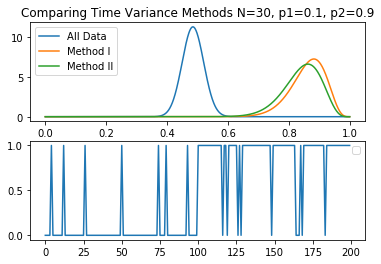

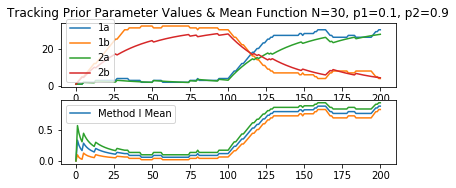

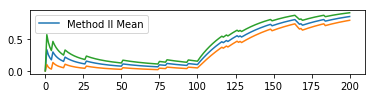

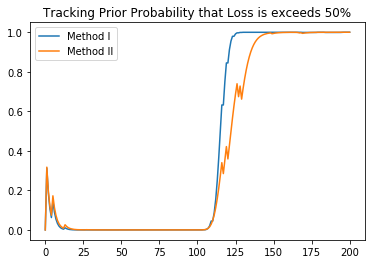

In [0]:
ploss1=0.1
ploss2=0.9
n=100
N=30
gamma=float(N)/float(N+1)
print gamma
m1a=np.zeros([2*n+1,],dtype='float64')
m2a=np.zeros([2*n+1,],dtype='float64')
m1b=np.zeros([2*n+1,],dtype='float64')
m2b=np.zeros([2*n+1,],dtype='float64')
m1a[0]=1
m2a[0]=1
m1b[0]=1
m2b[0]=1
mu1=np.zeros_like(m1a)
sd1=np.zeros_like(m1a)
mu2=np.zeros_like(m1a)
sd2=np.zeros_like(m1a)
fifty1=np.zeros_like(m1a)
fifty2=np.zeros_like(m1a)

dom=np.linspace(0,1,1000)
recv=np.concatenate([np.floor(np.random.rand(n,)+ploss1),np.floor(np.random.rand(n,)+ploss2)])
print recv

total=int(np.sum(recv))
fx0=beta(dom,total,2*n-total)


for k in range(len(recv)):
  if k<=N+1:
    m1a[k+1]=m1a[k]+recv[k]
    m1b[k+1]=m1b[k]+1-recv[k]
  else:
    m1a[k+1]=m1a[k]+recv[k]-recv[k-N]
    m1b[k+1]=m1b[k]-(recv[k]-recv[k-N])
  m2a[k+1]=1+gamma*(m2a[k]+recv[k]-1)
  m2b[k+1]=1+gamma*(m2b[k]-recv[k])
  
  mu1[k+1]=m1a[k+1]/(m1a[k+1]+m1b[k+1])
  sd1[k+1]=np.sqrt(m1a[k+1]*m1b[k+1]/(m1a[k+1]+m1b[k+1])/(m1a[k+1]+m1b[k+1])/(m1a[k+1]+m1b[k+1]+1))
  mu2[k+1]=m2a[k+1]/(m2a[k+1]+m2b[k+1])
  sd2[k+1]=np.sqrt(m2a[k+1]*m2b[k+1]/(m2a[k+1]+m2b[k+1])/(m2a[k+1]+m2b[k+1])/(m2a[k+1]+m2b[k+1]+1))
  
  fifty1[k+1]=integral(0.5,1.,1000,m1a[k+1],m1b[k+1])/integral(0.,1.,1000,m1a[k+1],m1b[k+1])
  fifty2[k+1]=integral(0.5,1.,1000,m2a[k+1],m2b[k+1])/integral(0.,1.,1000,m2a[k+1],m2b[k+1])

  # beta_cdf[k]=integral(0.,dom[k],1000,total,n-total)/integral(0.,1.,1000,total,n-total)
  
fx1=beta(dom,m1a[-1],m1b[-1])
fx2=beta(dom,m2a[-1],m2b[-1])
print m1a[-1],m1b[-1]
print m2a[-1],m2b[-1]

# print(m2a-m1a)
# print(m2b-m1b)


plt.subplot(211)
plt.title("Comparing Time Variance Methods N=30, p1=0.1, p2=0.9")
plt.plot(dom,fx0,label="All Data")
plt.plot(dom,fx1,label="Method I")
plt.plot(dom,fx2,label="Method II")
plt.legend()

plt.subplot(212)
plt.plot(recv)
plt.legend()
plt.show()

plt.subplot(311)
plt.title("Tracking Prior Parameter Values & Mean Function N=30, p1=0.1, p2=0.9")
plt.plot(m1a,label="1a")
plt.plot(m1b,label="1b")
plt.plot(m2a,label="2a")
plt.plot(m2b,label="2b")
plt.legend()

plt.subplot(312)
plt.plot(mu1,label="Method I Mean")
plt.plot(mu1-sd1)
plt.plot(mu1+sd1)
plt.legend()
plt.show()

plt.subplot(313)
plt.plot(mu2,label="Method II Mean")
plt.plot(mu2-sd2)
plt.plot(mu2+sd2)
plt.legend()
plt.show()

plt.figure()
plt.title("Tracking Prior Probability that Loss is exceeds 50%")
plt.plot(fifty1,label="Method I")
plt.plot(fifty2,label="Method II")
plt.legend()
plt.show()

# Markov Jump Process

In [0]:
ploss=0.3
n=200
recv=np.floor(np.random.rand(n+1,)+ploss)
# print recv
dom=np.linspace(0,1,1000)
total=int(np.sum(recv))-recv[0]
# fx=beta(dom,total,n-total)
# beta_cdf=np.zeros_like(dom)
# for k in range(len(dom)):
#   beta_cdf[k]=integral(0.,dom[k],1000,total,n-total)/integral(0.,1.,1000,total,n-total)
# plt.plot(dom,beta_cdf)
# plt.plot(dom,fx)
# plt.show()
state=recv[0]
drecv=recv[1:]-recv[:-1]
totals=[np.sum(drecv==-1),np.sum(drecv==0),np.sum(drecv==1)]
print totals
print total
## tt=[[0,-1],[1,0]]
totals_mat=np.array([[total-totals[2],totals[0]],[totals[2],n-total-totals[0]]])
print totals_mat


[40, 121, 39]
58.0
[[ 19.  40.]
 [ 39. 102.]]


# Latent Parameter Inference using Beta Prior

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


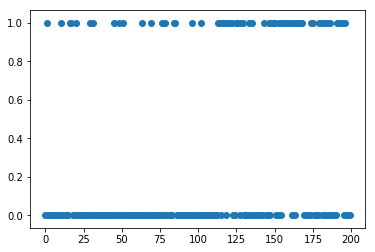

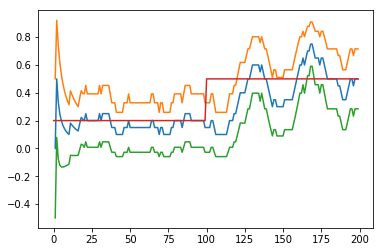

In [0]:
ploss=[0.2,0.5]
data1=np.floor(np.random.rand(100,)+ploss[0])
data2=np.floor(np.random.rand(100,)+ploss[1])
data=np.concatenate([data1,data2])
mu=np.zeros_like(data)
sd=np.zeros_like(data)
N=20
for k in range(len(data)):
  if k<N:
    a=np.sum(data[:k])+1
    b=k-a+1
    mu[k]=(a-1)/k
    sd[k]=np.sqrt(a*b/(a+b)**2/(a+b+2))
  else:
    a=np.sum(data[k-N:k])+1
    b=N-a-1
    mu[k]=(a-1)/N
    sd[k]=np.sqrt(a*b/(a+b)**2/(a+b+2))

plt.scatter(range(len(data)),data)
plt.show()

plt.plot(mu)
plt.plot(mu+2*sd)
plt.plot(mu-2*sd)
plt.plot(np.concatenate([ploss[0]*np.ones(100,),ploss[1]*np.ones(100,)]))
plt.show()

In [0]:
print sd

[0.         0.25       0.21081851 0.20412415 0.18516402 0.16666667
 0.15058465 0.13693064 0.12535024 0.11547005 0.10697244 0.11572751
 0.10878566 0.10258148 0.09701425 0.09199751 0.08745788 0.09296223
 0.09609168 0.09231862 0.09609168 0.10143412 0.09609168 0.09609168
 0.09609168 0.09609168 0.09609168 0.09609168 0.09609168 0.09609168
 0.10143412 0.09609168 0.10143412 0.10143412 0.10143412 0.10143412
 0.10143412 0.09609168 0.08896361 0.08896361 0.08896361 0.07957147
 0.07957147 0.07957147 0.07957147 0.07957147 0.08896361 0.08896361
 0.08896361 0.09609168 0.08896361 0.08896361 0.08896361 0.08896361
 0.08896361 0.08896361 0.08896361 0.08896361 0.08896361 0.08896361
 0.08896361 0.08896361 0.08896361 0.08896361 0.09609168 0.09609168
 0.08896361 0.08896361 0.08896361 0.07957147 0.08896361 0.08896361
 0.07957147 0.07957147 0.07957147 0.07957147 0.07957147 0.08896361
 0.08896361 0.09609168 0.09609168 0.09609168 0.09609168 0.09609168
 0.08896361 0.09609168 0.10143412 0.10143412 0.10143412 0.1014